# VELOCITY/KINETIC ENERGY CALCULATION

This notebook contains the code to calculate velocity and kinetic energy of the particles (metallic spheresin the vibrating platform) by means of the DataFrames with the positions and the trajectories of the particles previously processed with other code.

There are some libraries that are used, such as numpy, pandas, matplot or trackpy. In addition, some functions are defined to simplify the DataFrames as well as to calculate the velocity.

The structure of the code below is as follows:
1. Load and import Python Libraries.

2. Defined the functions that are used to obtain the parameters from the DataFrames and after that calculate the velocity (and the kinetic energy). 
* There are some extra auxiliary functions that are useful for checking the data.
    
3. Import the Dataframes under study.

4. Calculate the velocity and apend the data to the dataframe with new columns.

5. Export and save the data.


# 1. LOAD PYTHON LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trackpy as tp
import pims

#interactive graphics
%matplotlib widget 

from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image

L= 800 # system size (pixels)

In [7]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


#  2. DEFINITION OF ALL FUNCTIONS

## __tracks_len:__ get list of tracks ids; and no. of tracks

INPUT: data frame 'df' with tracks

OUTPUT: 
* lengths: array with lenghts of all tracks
* track_list: array with tracks IDs 
* ntracks: no. of tracks

## __reindex_tracks:__ resets tracks IDs in logical order: 1,2,3...., ntracks

INPUT: 

* df: data frame with tracks
* arr: array with tracks list

OUTPUT: data frame with 'track' column modified

In [8]:
def tracks_len(df):
    track_list = np.unique(df.track.values) # list of current track_listk IDs
    ntracks = len(track_list)
    lengths = np.array( [len(df[df.track==i]) for i in track_list] ) # length of each track
    return track_list, lengths, ntracks

def reindex_tracks(df, arr):
    # replace tracks IDs with logical order count
    ntracks = len(arr)
    for i in range(ntracks):
        df.loc[df.track == arr[i],'track'] = i
    return df

## Velocity, <v²> calculation and plotting

### velocity(df)

For each trajectory velocity is calculated by means of the difference between positions along the trajectory.

### <v²>(velocity)
Once the velocity for each instant of the trajectory is calculated and it has been added to the dataframe, the <v²> can be calculated. 

Here it is important to clarify if filtering the previous velocity data is needed to drop big values (that correspond to changes of regions through colissions between two particles).

### Plot <v²>
Plot the <v²> for each instant (frame).

In [9]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


# 3. READ DATAFRAME (from pickle file)

Para automatizarlo, habría que hacer un bucle con todos los cálculos juntos.

Hay que aclarar si es necesario filtrar para aquellos picos de velocidad correspondiente a las colisiones aisladas de las partículas.


In [3]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.003125_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


NameError: name 'pd' is not defined

### Obtain tracks list, total number and length of each track

In [6]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

### Function to plot trajectories through the index of the track

run 'plot.close(t_id)' when finished



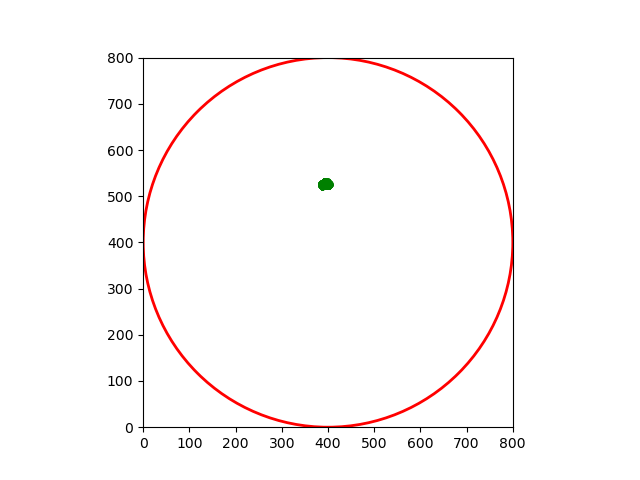

In [74]:
t_id = 8
plot_track(data, t_id)

run 'plot.close(t_id)' when finished



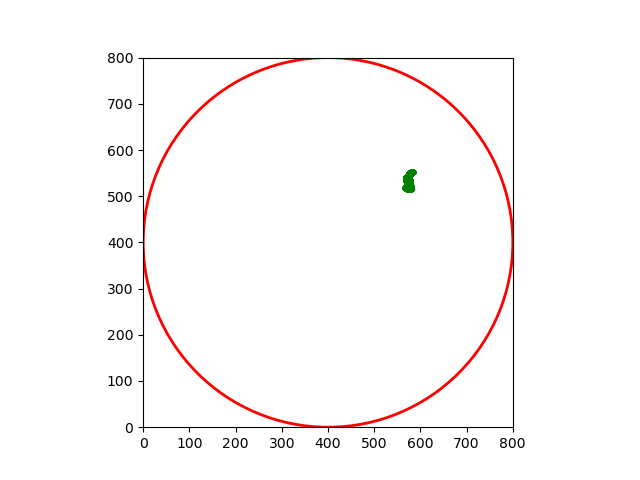

In [77]:
t_id = 2
plot_track(data, t_id)

In [76]:
plt.close('all')

## Velocity calculation
#### These are the cells to calculate the velocity for each dataframe

#### densidad 0.003125

In [5]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.003125_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [6]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [7]:
data=velocity(data)


0


In [9]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.003125_f75Hz.pkl')

In [3]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [12]:
v2media=v2media(data)

In [33]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.00.3125_f75Hz.pkl')

#### densidad 0.00625

In [4]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.00625_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [5]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [6]:
data=velocity(data)


0


In [7]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.00625_f75Hz.pkl')

In [3]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [8]:
v2media=v2media(data)

In [9]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.00625_f75Hz.pkl')

#### densidad 0.0125

In [4]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.0125_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [5]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [6]:
data=velocity(data)


0
100


In [7]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.0125_f75Hz.pkl')

In [3]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [8]:
v2media=v2media(data)

In [9]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.0125_f75Hz.pkl')

#### densidad 0.025

In [4]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.025_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [5]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [6]:
v2=velocity(data)


0
100
200


In [7]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.025_f75Hz.pkl')

In [3]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [8]:
v2media=v2media(v2)

In [9]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.025_f75Hz.pkl')

#### densidad 0.05

In [23]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.05_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [24]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [25]:
vel=velocity(data)


0
100
200
300
400
500


In [26]:
vel.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.05_f75Hz.pkl')

In [3]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [27]:
v2media=v2media(vel)

In [28]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.05_f75Hz.pkl')

#### densidad 0.075

In [37]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.075_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [38]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [39]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000


In [40]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.075_f75Hz.pkl')

In [3]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [41]:
v2media=v2media(data)

In [42]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.075_f75Hz.pkl')

#### densidad 0.1

In [43]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.1_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [44]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [45]:
vel=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200


In [46]:
vel.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.1_f75Hz.pkl')

In [3]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [51]:
v2=v2media(vel)

In [52]:
v2.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.1_f75Hz.pkl')

#### densidad 0.125

In [53]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.125_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [54]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [55]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [56]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.125_f75Hz.pkl')

In [57]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [ ]:
v2media=v2media(data)

In [ ]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.125_f75Hz.pkl')

#### densidad 0.15

In [10]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.15_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [11]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [12]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [13]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.15_f75Hz.pkl')

In [14]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [15]:
v2media=v2media(data)

In [16]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.15_f75Hz.pkl')

#### densidad 0.175

In [ ]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.175_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [ ]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [ ]:
data=velocity(data)


In [ ]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.175_f75Hz.pkl')

In [ ]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [ ]:
v2media=v2media(data)

In [ ]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.175_f75Hz.pkl')

#### densidad 0.2

In [19]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.2_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [20]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [21]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600


In [22]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.2_f75Hz.pkl')

In [23]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [24]:
v2media=v2media(data)

In [25]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.2_f75Hz.pkl')

#### densidad 0.225

In [26]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.225_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [27]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [28]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300


In [29]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.225_f75Hz.pkl')

In [30]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [31]:
v2media=v2media(data)

In [32]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.225_f75Hz.pkl')

#### densidad 0.25

In [33]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.25_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [34]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [35]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400


In [36]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.25_f75Hz.pkl')

In [37]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [38]:
v2media=v2media(data)

In [39]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.25_f75Hz.pkl')

#### densidad 0.275

In [40]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.275_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [41]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [42]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600


In [43]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.275_f75Hz.pkl')

In [44]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [45]:
v2media=v2media(data)

In [46]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.275_f75Hz.pkl')

#### densidad 0.3

In [47]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.3_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [48]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [49]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800


In [50]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.3_f75Hz.pkl')

In [51]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [52]:
v2media=v2media(data)

In [53]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.3_f75Hz.pkl')

#### densidad 0.35

In [54]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.35_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [55]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [56]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100


In [57]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.35_f75Hz.pkl')

In [58]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [59]:
v2media=v2media(data)

In [60]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.35_f75Hz.pkl')

#### densidad 0.4

In [61]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.4_f75Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [62]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [ ]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.4_f75Hz.pkl')

In [ ]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [ ]:
v2media=v2media(data)

In [ ]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.4_f75Hz.pkl')

# FRECUENCIA 50 Hz

#### densidad 0.003125

In [4]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.003125_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [5]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [6]:
data=velocity(data)


0
100


In [7]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.003125_f50Hz.pkl')

In [8]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [9]:
v2media=v2media(data)

In [10]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.003125_f50Hz.pkl')

#### densidad 0.00625

In [11]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.00625_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [12]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [13]:
data=velocity(data)


0


In [14]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.00625_f50Hz.pkl')

In [15]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [16]:
v2media=v2media(data)

In [17]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.00625_f50Hz.pkl')

#### densidad 0.0125

In [18]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.0125_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [19]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [20]:
data=velocity(data)


0
100


In [21]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.0125_f50Hz.pkl')

In [22]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [23]:
v2media=v2media(data)

In [24]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.0125_f50Hz.pkl')

#### densidad 0.025

In [25]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.025_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [26]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [27]:
v2=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200


In [28]:
v2.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.025_f50Hz.pkl')

In [29]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [30]:
v2media=v2media(v2)

In [31]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.025_f50Hz.pkl')

#### densidad 0.05

In [32]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.05_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [33]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [34]:
vel=velocity(data)


0
100
200
300
400
500
600
700
800
900


In [35]:
vel.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.05_f50Hz.pkl')

In [36]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [37]:
v2media=v2media(vel)

In [38]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.05_f50Hz.pkl')

#### densidad 0.075

In [39]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.075_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [40]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [41]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000


In [42]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.075_f50Hz.pkl')

In [43]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [44]:
v2media=v2media(data)

In [45]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.075_f50Hz.pkl')

#### densidad 0.1

In [46]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.1_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [47]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [48]:
vel=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200


In [49]:
vel.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.1_f50Hz.pkl')

In [50]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [51]:
v2=v2media(vel)

In [52]:
v2.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.1_f50Hz.pkl')

#### densidad 0.125

In [53]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.125_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [54]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [55]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [56]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.125_f50Hz.pkl')

In [57]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [58]:
v2media=v2media(data)

In [59]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.125_f50Hz.pkl')

#### densidad 0.15

In [17]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.15_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [18]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [19]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [20]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.15_f50Hz.pkl')

In [21]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [22]:
v2media=v2media(data)

In [23]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.15_f50Hz.pkl')

#### densidad 0.175

In [67]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.175_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [68]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [69]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [70]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.175_f50Hz.pkl')

In [71]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [72]:
v2media=v2media(data)

In [73]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.175_f50Hz.pkl')

#### densidad 0.2

In [74]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.2_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [75]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [76]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [77]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.2_f50Hz.pkl')

In [78]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [79]:
v2media=v2media(data)

In [80]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.2_f50Hz.pkl')

#### densidad 0.225

In [81]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.225_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [82]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [83]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500


In [84]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.225_f50Hz.pkl')

In [85]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [86]:
v2media=v2media(data)

In [87]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.225_f50Hz.pkl')

#### densidad 0.25

In [88]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.25_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [89]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [90]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900


In [91]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.25_f50Hz.pkl')

In [92]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [93]:
v2media=v2media(data)

In [94]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.25_f50Hz.pkl')

#### densidad 0.275

In [95]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.275_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [96]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [97]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500


In [98]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.275_f50Hz.pkl')

In [99]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [100]:
v2media=v2media(data)

In [101]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.275_f50Hz.pkl')

#### densidad 0.3

In [102]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.3_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [103]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [104]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [105]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.3_f50Hz.pkl')

In [106]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [107]:
v2media=v2media(data)

In [108]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.3_f50Hz.pkl')

#### densidad 0.35

In [109]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.35_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [110]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [ ]:
data=velocity(data)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.35_f50Hz.pkl')

In [ ]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')


In [ ]:
v2media=v2media(data)

In [ ]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.35_f50Hz.pkl')

#### densidad 0.4

In [ ]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.4_f50Hz.pkl')
data = data.rename(columns={'particle':'track'})

#time=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/frametime_densidad0.003125_f75Hz.txt')

nt = np.max(data.frame.values) # number of frames (assumming there is at least one complete track)
#print('no. of frames in block: ', nt)
#print('\ndata frame head\n')
#data.head(10)


In [ ]:
track_list, lengths, ntracks = tracks_len(data)
#plt.plot(track_list); # reindex track list is only necessary if this plot is not a straight line

In [ ]:
data=velocity(data)


In [ ]:
data.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.4_f50Hz.pkl')

In [7]:
# suggestion:

# tr = track(df, id)
# vx = (tr.x[1:] - tr.x[:-1]) * fps
# vy = (tr.y[1:] - tr.y[:-1] ) * fps
# fps being frames per second
# v2 = vx**2 + vy**2
# temp = np.mean(v2) # this should be temperature/mass in units of pixel/s


def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,38418)
    ax.plot(v2media, '.', c='b')


In [ ]:
v2media=v2media(data)

In [ ]:
v2media.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.4_f50Hz.pkl')

# PRUEBAS

In [62]:
v2media = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/v2media_densidad0.175_f75Hz.pkl')
#velocity = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.25_f75Hz.pkl')
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.175_f75Hz.pkl')
#data = data.rename(columns={'particle':'track'})
nt = np.max(data.frame.values)

In [25]:
plt.close('all')

Trayectorias para densidad 0.2

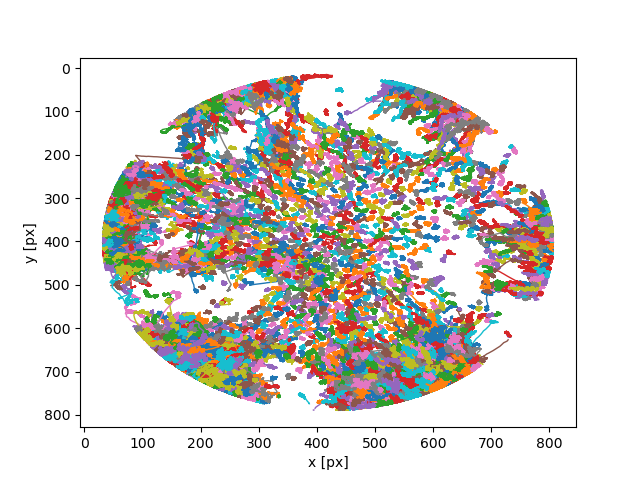

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [79]:
tp.plot_traj(data)

Trayectorias para densidad 0.175

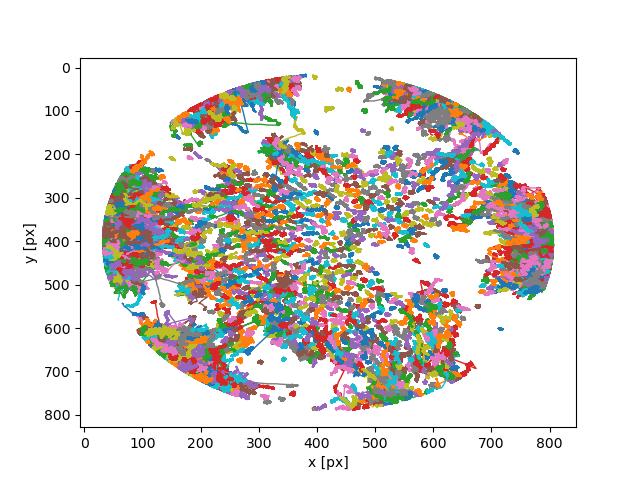

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [64]:
tp.plot_traj(data)

Trayectorias para densidad 0.15

In [31]:
plt.close('all')

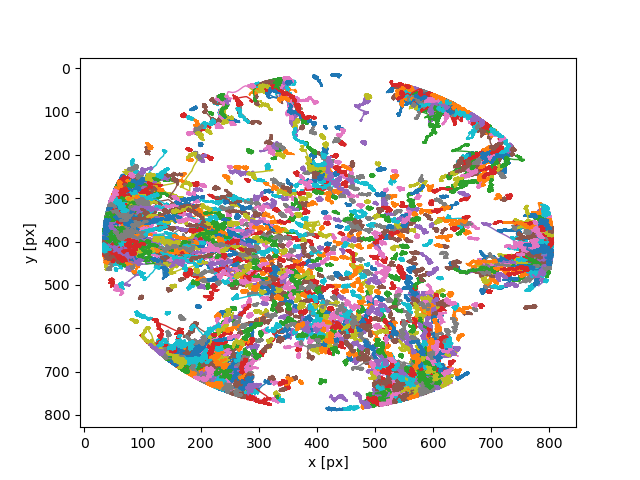

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [30]:
tp.plot_traj(data)

Trayectorias para densidad 0.1

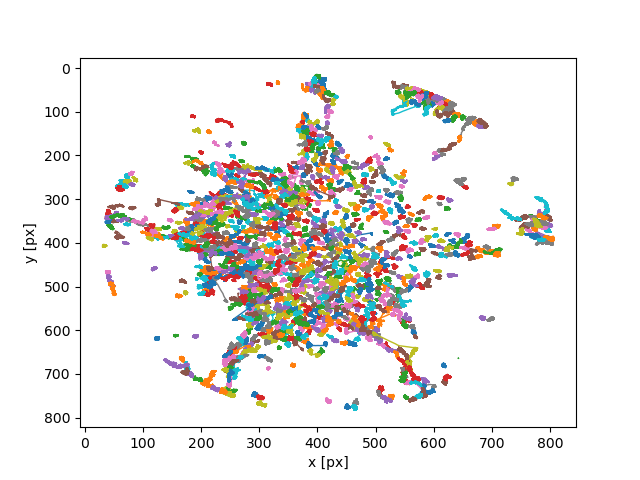

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [74]:
tp.plot_traj(data)

Trayectorias para densidad 0.075

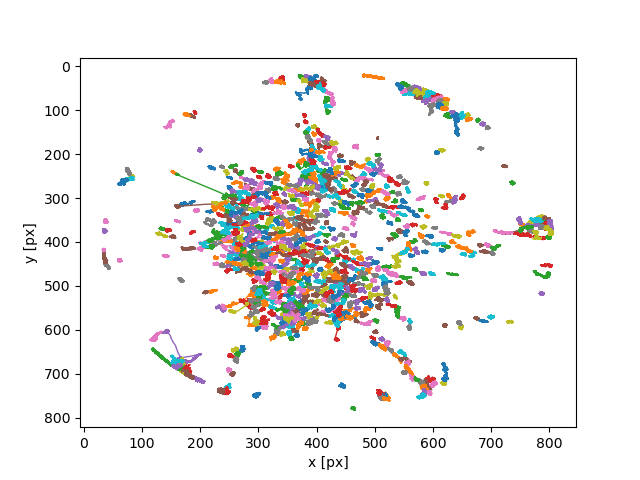

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [8]:
tp.plot_traj(data)

Trayectorias para densidad 0.05

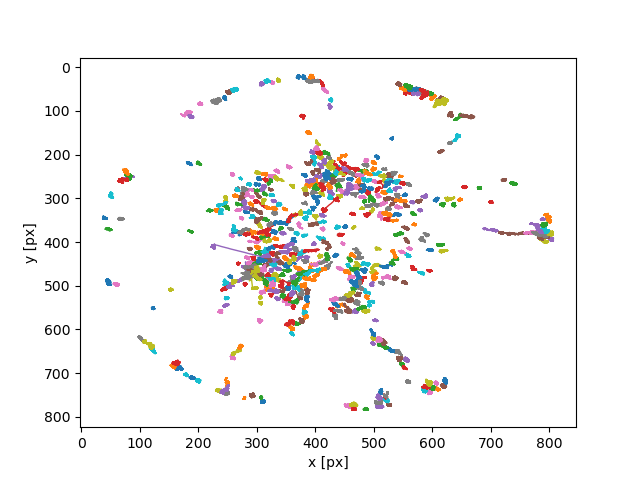

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [64]:
tp.plot_traj(data)

Trayectorias para densidad 0.025

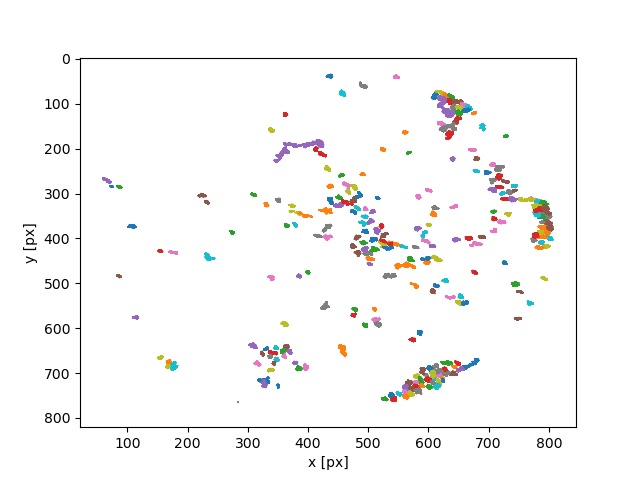

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [57]:
tp.plot_traj(data)

Trayectorias para densidad 0.0125

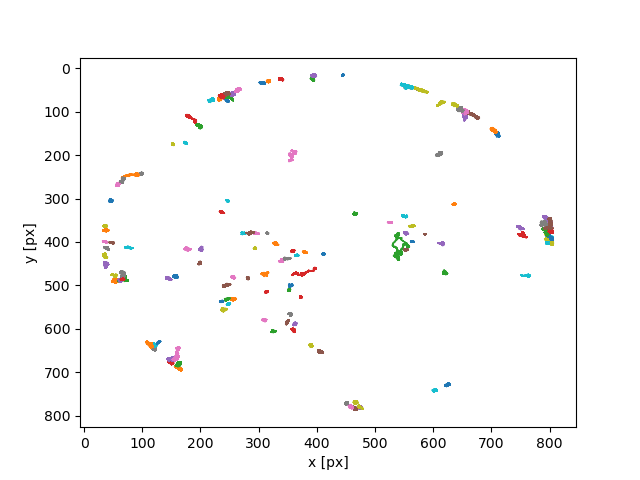

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [51]:
tp.plot_traj(data)

Trayectorias para densidad 0.00625

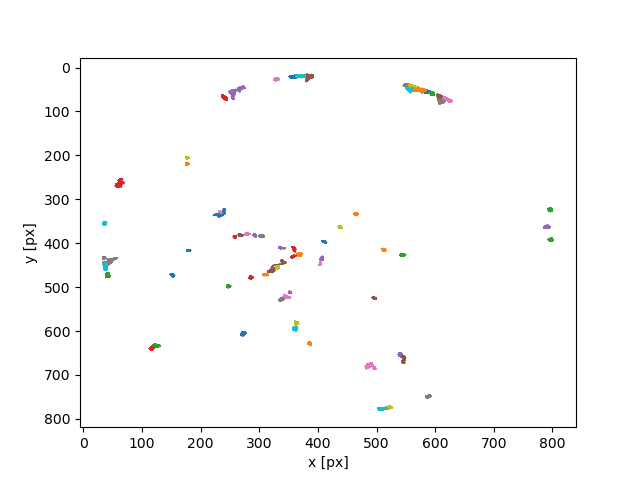

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [38]:
tp.plot_traj(data)

Trayectorias para densidad 0.003125

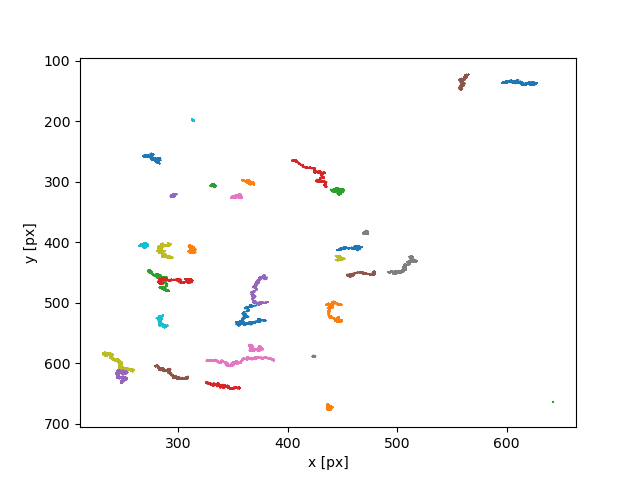

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [13]:
tp.plot_traj(data)

In [34]:
plt.close('all')

v² media para densidad 0.003215


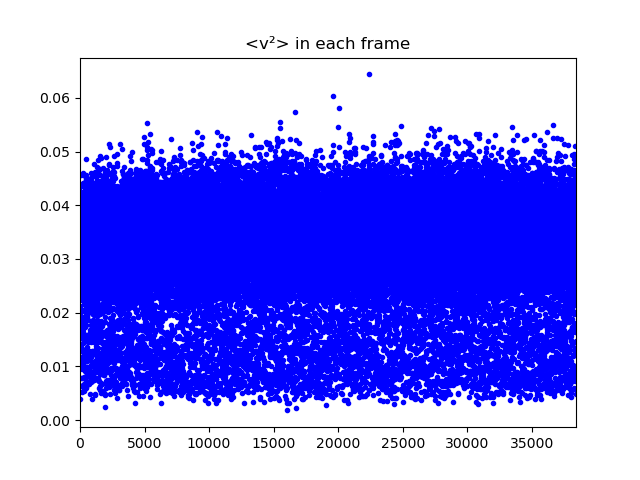

In [48]:
v2plot(v2media)

v² media para densidad 0.00625

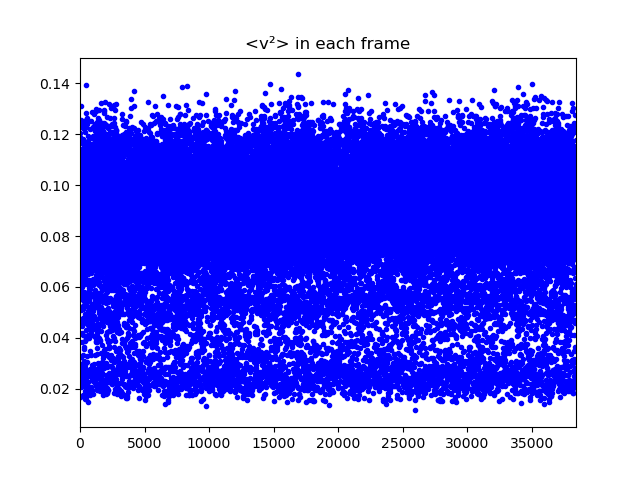

In [41]:
v2plot(v2media)

v² media para densidad 0.0125


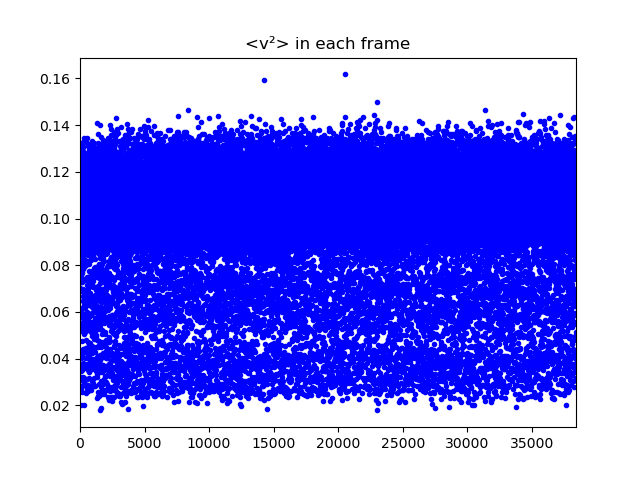

In [54]:
v2plot(v2media)

v² media para densidad 0.025


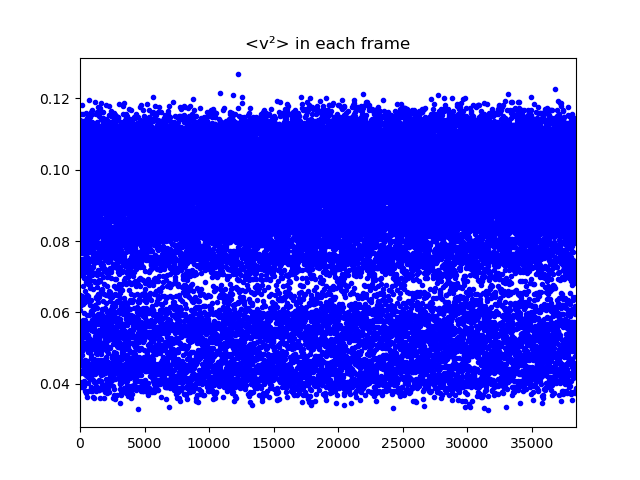

In [59]:
v2plot(v2media)

v² media para densidad 0.05

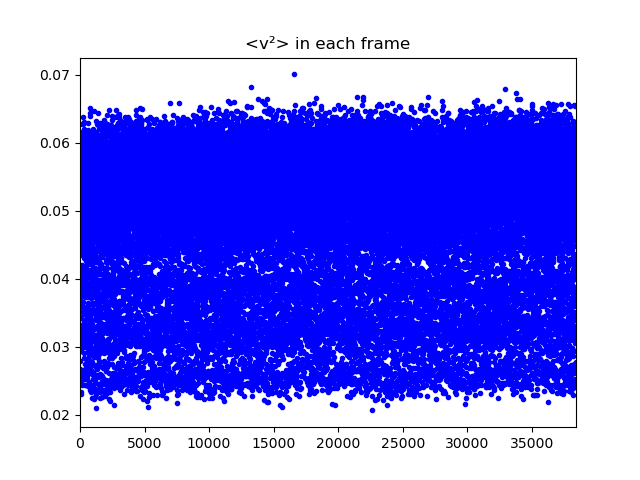

In [71]:
v2plot(v2media)

v² media para densidad 0.075

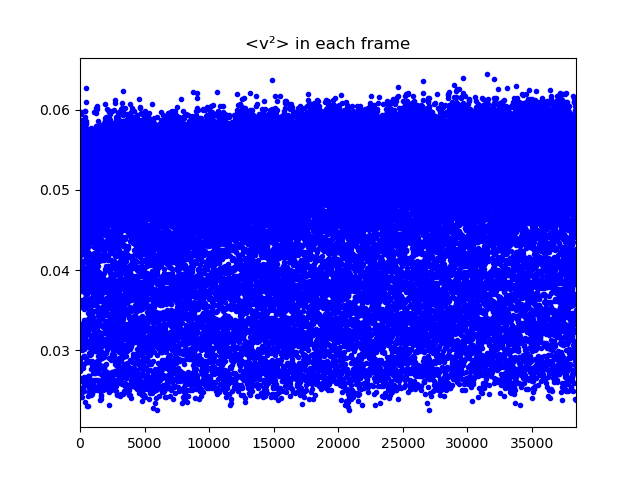

In [23]:
v2plot(v2media)

v² media para densidad 0.1


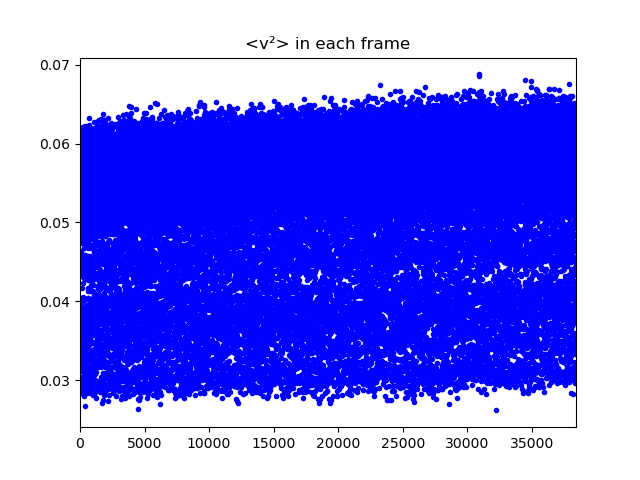

In [76]:
v2plot(v2media)

v² media para densidad 0.15


In [27]:
plt.close('all')

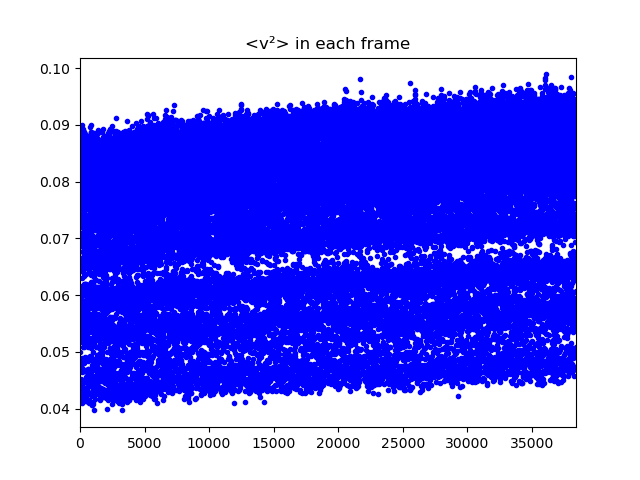

In [28]:
v2plot(v2media)

v² media para densidad 0.175


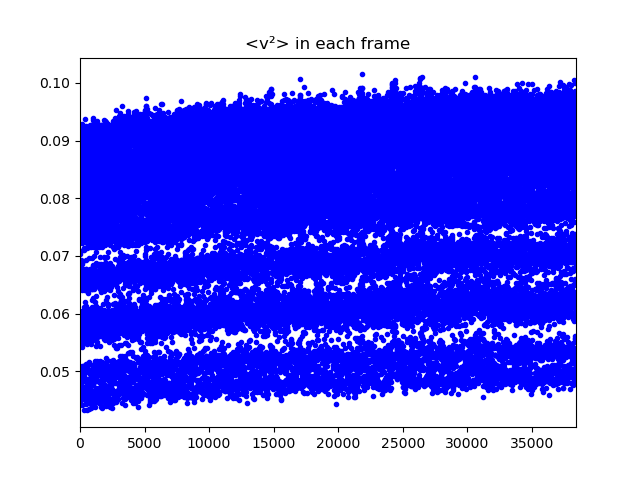

In [35]:
v2plot(v2media)

v² media para densidad 0.2


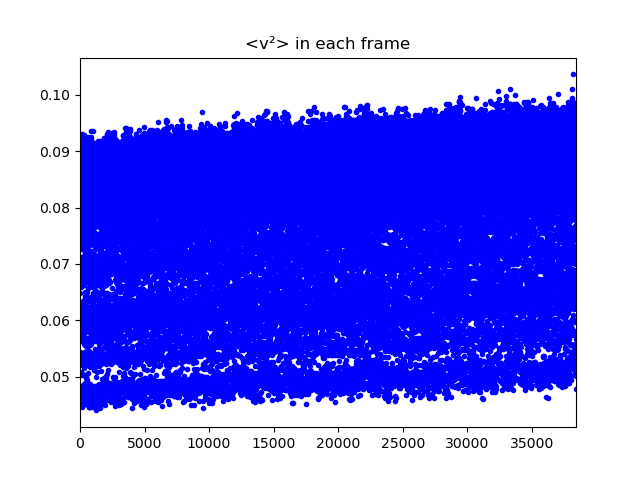

In [81]:
v2plot(v2media)

v² media para densidad 0.25

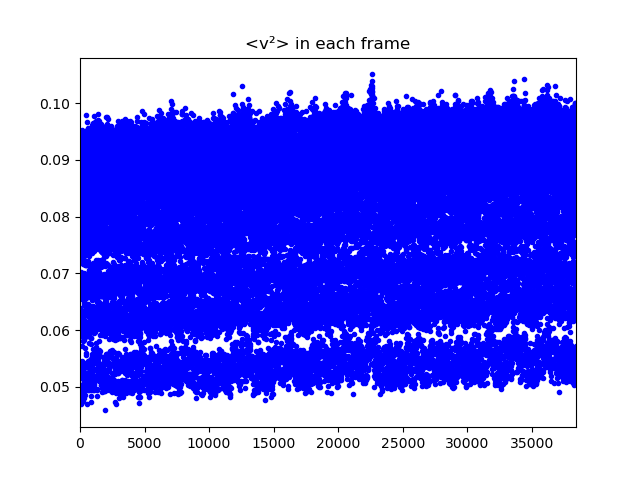

In [84]:
v2plot(v2media)

v² media para densidad 0.3

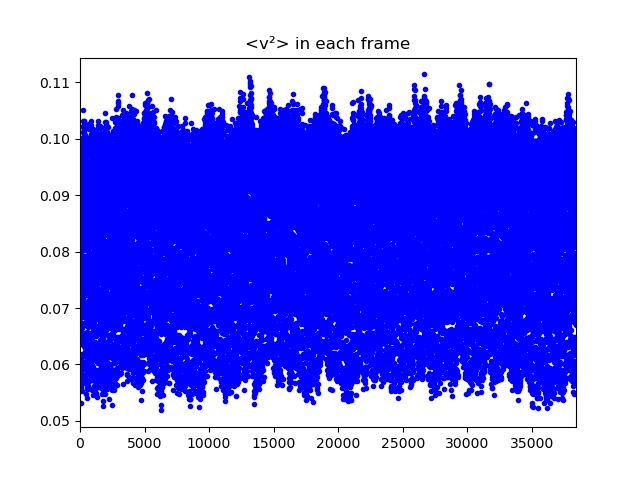

In [87]:
v2plot(v2media)

v² media para densidad 0.35

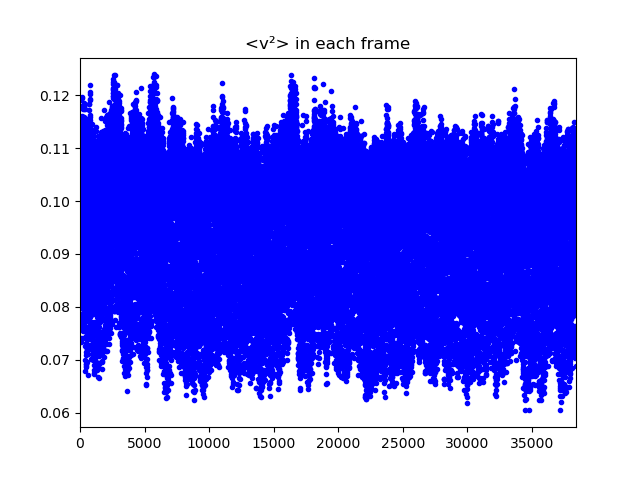

In [5]:
v2plot(v2media)

In [39]:
plt.close('all')

# * AUXILIARY FUNCTIONS *

## __split_short:__ SPLITS data frame into 3: one with short tracks and one with long enough tracks, and one with tracks with intermediate length (if limits are unequal)

INPUT
* df: data frame of tracks to split
* larr: list of lengths of each track
* ili: first threshold length; tracks longer than 'il' go to the long or intermediate tracks sub data frame
* ilf: second threshold; maximum length for the intermediate tracks

OUTPUT
* df_long, df_short: long, middle, and short tracks sub data frames, respectively

In [33]:
def split_short(df, larr, ili, ilf):
    # where: selects track indexes of length array whose values are < or >= than a value
    # isin: selects indexes of the table that fulfill condition in the line above,
    # in this case, track indexes for which value in length array is < or >= il
    # reset_index: resets data frame row index; drop=True means discard old row index
    df_short = df[df.track.isin(np.where(larr < ili)[0])].reset_index(drop=True)
    if ili != ilf:
        df_middle = df[ df.track.isin(np.where((larr >= ili) & (larr < ilf))[0]) ]
    else:
        df_middle = []
    df_long = df[df.track.isin(np.where(larr >= ilf)[0])].reset_index(drop=True)
    return df_long, df_middle, df_short

## Localize/characterize short tracks

## __n2d_plot:__ 2D tracks density

INPUT
* idf: figure index (just formal, needed by python)
* df: data frame with tracks
* nbins: no. of bins of histogram
* fs: figure size
* tit: figure title

OUTPUT

H: 2D tracks density field

In [35]:
def n2d_plot(idf, df,nbins,fs,tit):
    H, xedges, yedges= np.histogram2d(df.x.values, df.y.values, bins=nbins)
    H = H.T
    plt.figure(idf,figsize=(fs,fs))
    ax = plt.subplot()
    ax.set_title(tit)
    im = ax.imshow(H, cmap='nipy_spectral', origin='lower', interpolation='gaussian', 
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]);
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%",pad=0.1)
    plt.colorbar(im, cax=cax)
    return H

In [19]:
def track(df, t_id):
    tr = df[df.track==t_id]
    return tr

def plot_track(df,t_id):
    fig = plt.figure(t_id)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0,L)
    ax.set_ylim(0,L)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((L/2,L/2),L/2, fill=False, edgecolor='r', linewidth=2));
    ax.plot(track(df, t_id).x.values, track(df,t_id).y.values, '-', c='g')
    print('run \'plot.close(t_id)\' when finished\n')


## Mass center trajectory calculation
## cm_t(df,t_id)

INPUT
* df: dataframe with particles data
* t_id= trajectory ID

OUTPUT

* xmean, ymean: Mean x,y position for trajectory t_id

In [75]:
def cm_t(df,t_id):
    tr = df[df.track==t_id] # suggestion: tr= track(df, id)
    xmean=tr.x.mean() # suggestion: remove
    ymean=tr.y.mean() # suggestion: remove
    return xmean,ymean # suggestion: return np.mean(tr.x), np.mean(tr.y)

def plot_cm(df,t_id): # suggestion: generalize plot_track function so that 
    # it will do both (tracks and mass center) either simultaneously or separately
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0,L)
    ax.set_ylim(0,L)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((L/2,L/2),L/2, fill=False, edgecolor='r', linewidth=2));
    #ax.plot(track(df, t_id).x.values, track(df,t_id).y.values, ',', c='b')
    xmean,ymean=cm_t(df,t_id)
    ax.scatter(xmean,ymean,c='g',marker='.')
        
    #for i in range (nt):
     #   xmean,ymean=cm_t(df,i)
      #  ax.scatter(xmean,ymean,c='g',marker='.')
        

### In case the trajectories from the dataframe must be divided, this is the code

In [34]:
data_long, data_middle, data_short = split_short(data, lengths, 1000, 10000)

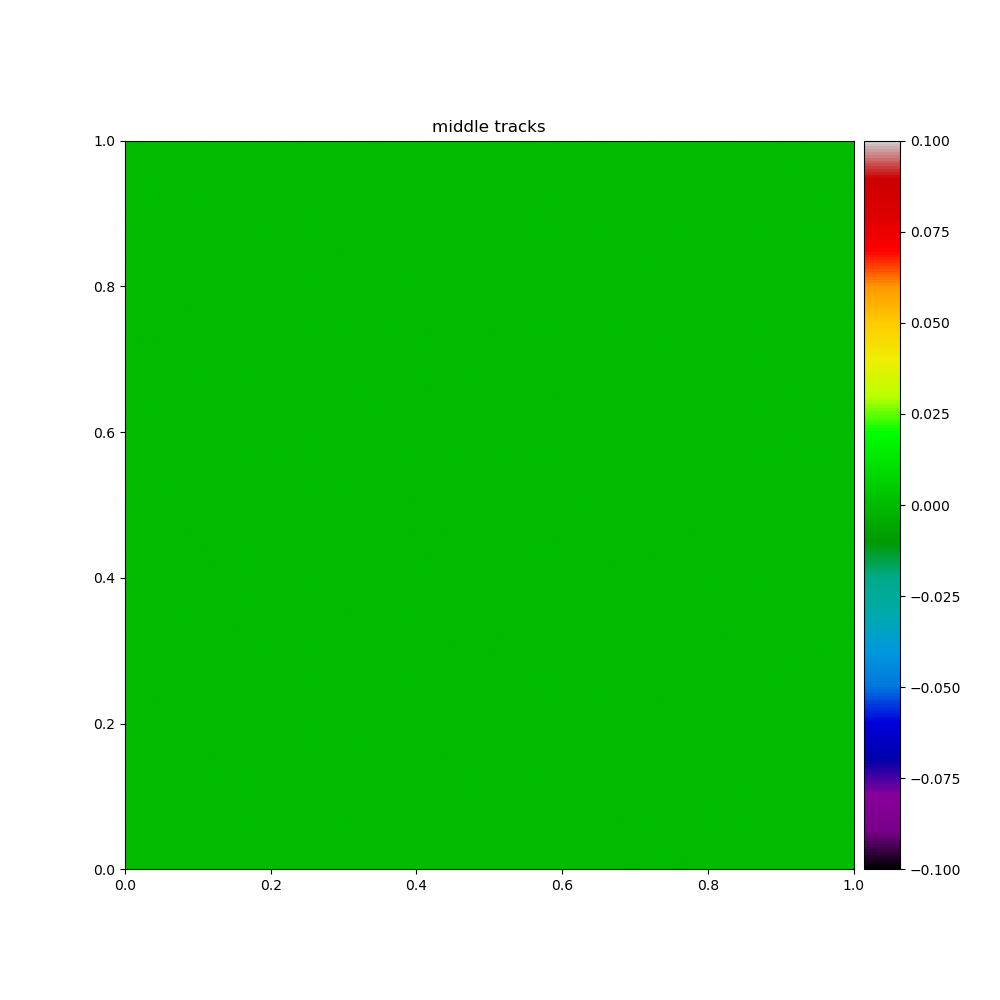

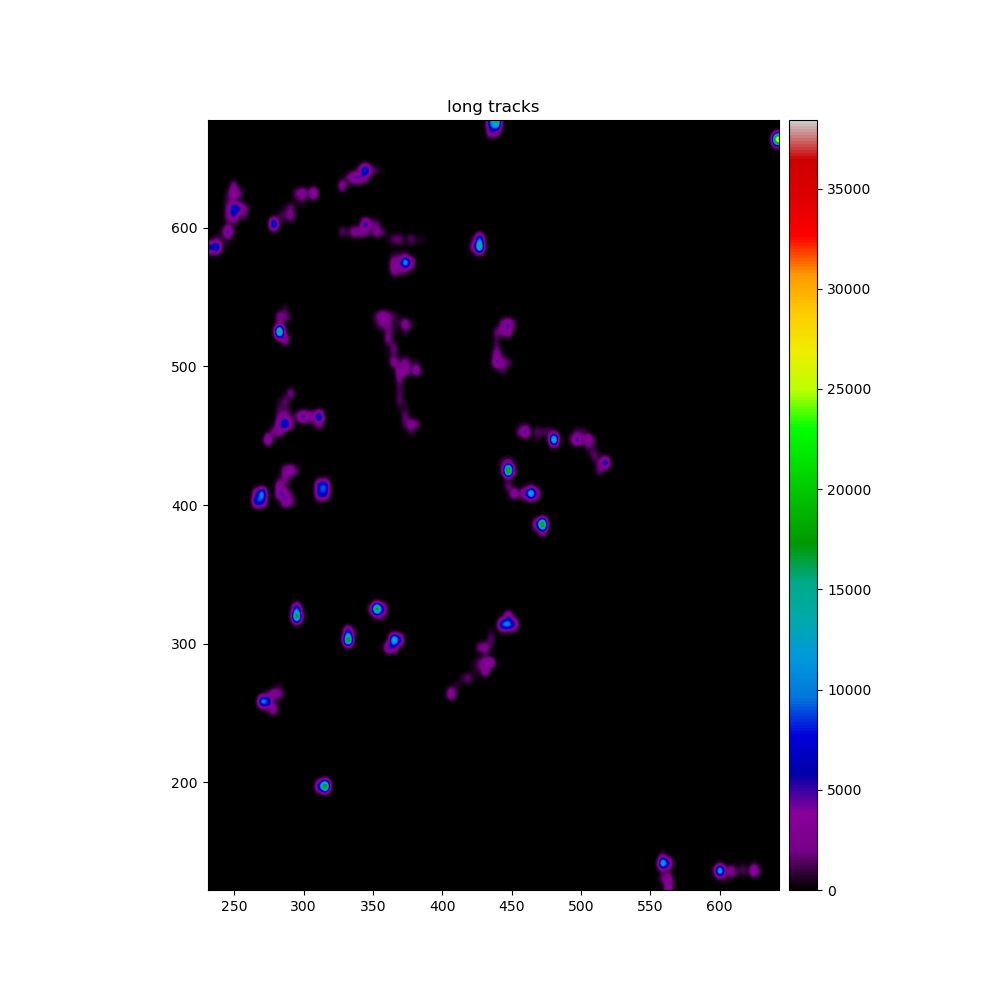

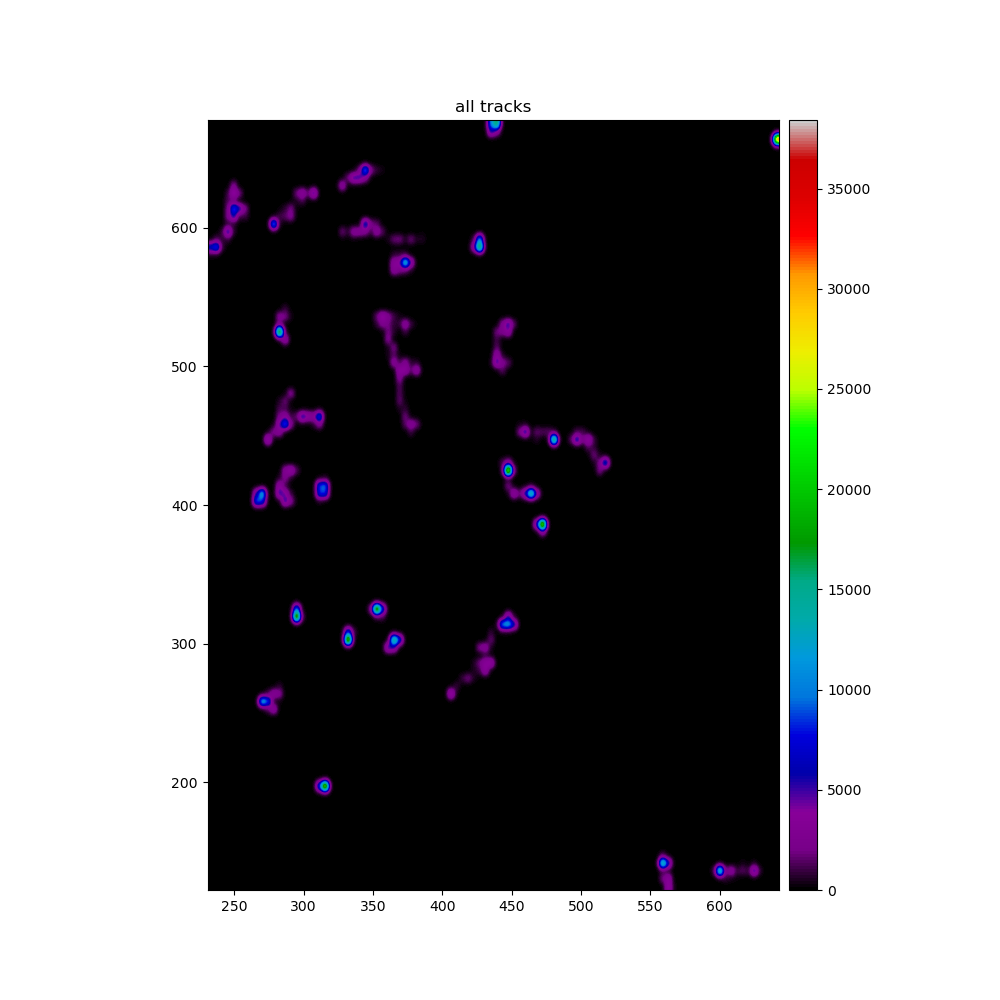

In [36]:
# short tracks particle density
H_short = n2d_plot(1, data_short, 100, 10, "short tracks")
# middle tracks 
H_middle = n2d_plot(2, data_middle, 100, 10, "middle tracks")
# long tracks
H_long = n2d_plot(3, data_long, 100, 10, "long tracks")
# all tracks particle density
H = n2d_plot(4, data, 100, 10, "all tracks")